# Regresión Lineal 

## Introducción
---
<div style="text-align: justify"> 
<p>La palabra regresión hace referencia a un conjunto de técnicas para modelar matemáticamente relaciones entre una o más variables independientes, es decir nos permite definir funciones matemáticas que permiten <b>predecir</b> el valor de una variable dependiente a partir de una o varias variables independientes. Por tanto, esto ofrece una manera de describir las observaciones o datos y predecir su comportamiento para diferentes escenarios.
    
<b>Por tanto esta facultad de predicción hace a la regresión una técnica esencial para el Aprendizaje de Máquina.</b>

Uno de los tipos de regresión más comunes es la Regresión Lineal y esta se sustenta de dos supuestos:

<ol>
<li>Se asume que existe una relación lineal entre la variable dependiente $\mathit{y}$ con las variables independientes $\mathbf{x}$, donde la $\mathit{y}$ puede ser representada como la sumatoria ponderada de los elementos de $\mathbf{x}$, dado un cierto ruido $\varepsilon$
<li>Se asume que cualquier ruido sigue una distribución gausiana.</li>
</ol>
    
El objetivo es encontrar la función matemática que más se ajuste a los datos y minimice el error entre las observaciones iniciales y las predicciones. Uno de los métodos más utilizados en la regresión lineal es el método de <b>mínimos cuadrados</B>.
 </div>


![image](https://github.com/gacuervol/GIT-IA-Y-AP/blob/main/Regresion_lineal/lr.JPG?raw=true)

## Historia
---
La historia de la regresión está ligada a la historia de la co-relación, los primeros registros de este concepto se remontan a 1889 en Inglaterra; **Francis Galton** un polímata inglés y primo de Charles Darwin tiene la atribución de ser el primero en proponer estas dos ideas.

En palabras de Galton (1888):
> "Cuando la variación de un órgano variable es acompañada en promedio por más o menos la variación de la otra... Es fácil ver que la correlación debe ser una consecuencia de la variación de las variaciones de los dos órganos siendo parcialmente debido a causas comunes "

Los modelos teóricos proporcionados por Galton para el análisis estadístico establecieron las bases de lo que sería la formulación de la regresión. Durante la investigación de Galton donde resolviendo la relación hereditaria de guisantes y el tamaño de su progenie, este descubrió lo que hoy en día se conoce como la ley de la reversión o regresión la cual postula que:

> la media de cualquier porción de la progenie difiere de la media poblacional de una población en un cantidad proporcional a desviación de la media de los padres. sin embargo el desplazamiento de la descendencia respecto a la media poblacional es siempre menos que la de los padres y en consecuencia esta media es siempre reversible o posible de devolver a la media poblacional y esta relación es posible de expresar matemáticamente como una ecuación lineal.



# Planteamiento del algoritmo

Consideremos un conjunto de datos $\mathbf{x}$ que representan la varaible independiente y otro conjunto de datos $\mathbf{y}$ que describen la variable dependiente.

De manera que si asumimos que existe un arelación lineal entre estas dos varaibles podemos definir una función matemtica que nos permita modelar esta relación:
$$\hat{y_i} \approx b_0 + b_i x_i$$

o en otras palabras:

$$\mathsf{X^\top_{2xn}} \mathsf{X_{nx2}} \mathsf{b_2} \approx \mathsf{X^\top_{2xn}} \hat{\mathsf{y_n}}$$

$$\Updownarrow$$
$${\tiny \begin{bmatrix} 1 & 1 &\dots& 1 \\ x_2 & x_1 & \dots& x_n\end{bmatrix} \begin{bmatrix}  1 & x_1 \\ 1 & x_2\\\vdots & \vdots\\1&x_n\end{bmatrix} \begin{bmatrix}  b_0 \\ b_1\end{bmatrix} = \begin{bmatrix}1 & 1 & \dots& 1 \\ x_2 & x_1 &\dots& x_n \end{bmatrix} \begin{bmatrix}y_1\\ y_2 \\ \vdots \\y_n \end{bmatrix}}$$


Para esto se debe utilizar un algortimo que se base en minimizar el error cuadrático "*least squared error (LSE)*" entre el modelo $\hat{\mathbf{y}}$ respecto a $\mathit{x}^2$.

Es decir se debe encontrar el mínimo de la función **LSE** donde la sumatoria de los residuales ($e_i = y_i - \hat{y}=y_i - \mathit{b_0} + \mathit{b_i} \mathit{x}_{i}$) al cuadrado sea lo menor posible, por lo que se vuelve un ejercicio de optimización.

$$LSE = \sum_{i=1}^n e_i^2=e^2_1+e^2_2+\dots+e^2_n $$
$$(LSE)' = 0$$

Esto con el fin de hallar los coeficientes ($b_0, b_i$) de la función de regresión $\hat{y_i} \approx b_0 + b_i x_i$

$$b_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$b_0 = \bar{y}-b_1 \bar{x}$$

## Algoritmo
---

Para el siguiente ejemplo de utilizaron los datos de edad de corteza oceánica junto con el grosor sedimentario de la Cuenca Panamá

para la varaible dependiente $y$ será *Sed_thickness (m)* el grosor de la pila sedimentaria
para la varaible de predictora $x$ será *Age (Ma)* edad de la corteza en millones de años (Ma),
para la variable $\hat{y}$ usamos la variable ``y_est``
para hallar los ceoficientes $b_0$ y $b_1$ se usara la funcion de Numpy ```np.polyfit(x, y, deg=1)``` la cual utiliza la función de mínimos cuadrados (LSE)

In [29]:
#importamos los paquetes necesarios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [30]:
#importamos el set de datos
ruta = 'C:/Users/mofoko/Desktop/10 semestre/Sist. intel/Proyecto'
df_Flujo_calor = pd.read_csv(os.path.join(ruta,'df_Flujo_calor3.csv'), index_col= 0)
df_Flujo_calor.shape

(1049, 17)

In [31]:
df_ejemplo= pd.concat([df_Flujo_calor['Sed_thickness (m)'], df_Flujo_calor['Age (Ma)']], axis = 1)
df_ejemplo                      

,Sed_thickness (m),Age (Ma)
0,279.0,10.1
1,211.0,7.6
2,203.0,5.9
3,159.0,3.6
4,145.0,3.1
...,...,...
1061,173.0,10.1
1063,201.0,10.2
1064,91.0,11.5
1065,68.0,8.2


In [32]:
x =  df_ejemplo['Age (Ma)']
y = df_ejemplo['Sed_thickness (m)']  

# fit a linear curve an estimate its y-values and their error.
b_1, b_0 = np.polyfit(x, y, deg=1)

y_est = b_1 * x + b_0



In [38]:
print(f'Coeficiente b_1: {round(b_1, 1)} \nIntercepto b_0: {round(b_0, 1)}')

Coeficiente b_1: 25.1 
Intercepto b_0: 31.6


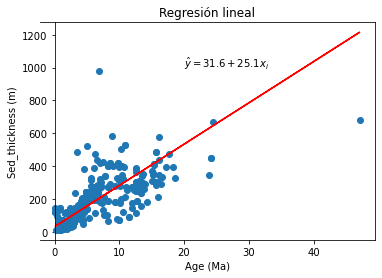

In [37]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o')
ax.plot(x, y_est, '-', c = 'r') #funcion o modelo

ax.set_title('Regresión lineal')
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Sed_thickness (m)')
plt.text(20, 1000, '$\hat{y}=31.6+25.1x_i$')
ax.spines['left'].set_position('zero')

plt.show()


## Conclusión
---
La regresión lineal es una técnica para modelar datos con el fin de lograr hacer predicciones a partir de los mismos, además de permitir ver el tipo de correlación y la fuerza de la misma entre varias variables.

Este modelo necesita de la definición de unos coeficientes que permiten ajustar una recta a los datos, para que esta curva pueda ajustarse a los datos con la menor desviación respecto a los mismos es necesario el uso de la metodología de los Mínimos Cuadrados.

La función de Mínimos Cuadrados (LSE) me permite hallar los coeficiente de la recta al encontrar el mínimo de esta función garantizando así la construcción del modelo lineal que mejor se ajuste a los datos.


# Bibliografía
---
>Aston Zhang, Zachary C. Lipton, Mu Li, & Alexander J. Smola (2020). Dive into Deep Learning. 87-88 pp

>Barnes, T. (1998). A history of regression: actors, networks, machines, and numbers. Environment and Planning A, 30. 212-215 pp

>Galton F, 1888, "Co-relations and their measurements, chiefly from anthropometric data"
Proceedings of the Royal Society of London 45 135 - 145 pp

> Gunderson, B., West, B.T. & Shedden, K. ( s.f.). Understanding and Visualizing Data with Python. Universidad de Michigan
https:/\www.coursera.org/learn/understanding-visualization-data

